# Canada House Price Prediction

**Final Project - AASD 4010 Deep Learning - I**
**Professor: Moe Fadaee**

**Group 2**
- Ahmed, Qusay
- Gonçalves, Ednaldo
- Khan, Sami 
- Osta, Mustafa
- Jack Chang

## Libraries

In [125]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Exploratory Data Analysis

In [126]:
# read the csv file
data = pd.read_csv("data/houses_edited.csv")
print(data.shape)

(15234, 22)


First 3 records of our dataset

In [127]:
data.head(3).T

,0,1,2
index,0,1,2
title,"1303 - 38 Grenville St, Toronto (C4461599) | Z...","2 Cabot Crt, Toronto (W4502992) | Zoocasa","1504 - 30 Roehampton Ave, Toronto (C4511330) |..."
final_price,855000,885000,550000
list_price,870000,898000,549900
bedrooms,2 + 1 beds,3 beds,1 beds
bathrooms,2,2,1
sqft,850.0,NaN,550.0
parking,1,6,0
description,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",Fantastic Opportunity To Live Within The Histo...,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...
mls,C4461599,W4502992,C4511330


In [128]:
#get some information about our DataSet
data.info()
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15234 entries, 0 to 15233
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    15234 non-null  int64  
 1   title                    15234 non-null  object 
 2   final_price              15234 non-null  int64  
 3   list_price               15234 non-null  int64  
 4   bedrooms                 15234 non-null  object 
 5   bathrooms                15234 non-null  int64  
 6   sqft                     10713 non-null  float64
 7   parking                  15234 non-null  int64  
 8   description              15185 non-null  object 
 9   mls                      15234 non-null  object 
 10  type                     15234 non-null  object 
 11  full_link                15234 non-null  object 
 12  full_address             15234 non-null  object 
 13  lat                      15234 non-null  float64
 14  long                  

,count,mean,std,min,25%,50%,75%,max
index,15234.0,9519.960943,4882.263253,0.000000,5677.500000,9803.500000,13667.750000,1.754300e+04
final_price,15234.0,882713.622752,618933.595240,103000.000000,535000.000000,715000.000000,989000.000000,1.318000e+07
list_price,15234.0,875093.005383,635807.189339,104900.000000,529000.000000,699900.000000,969900.000000,1.318000e+07
bathrooms,15234.0,2.122227,1.128122,1.000000,1.000000,2.000000,3.000000,1.400000e+01
sqft,10713.0,1116.469336,691.331305,250.000000,650.000000,900.000000,1300.000000,4.374000e+03
parking,15234.0,1.559144,1.345642,0.000000,1.000000,1.000000,2.000000,1.100000e+01
lat,15234.0,43.702658,0.056806,43.588176,43.652058,43.690963,43.755905,4.383937e+01
long,15234.0,-79.394666,0.095425,-79.621693,-79.454611,-79.395589,-79.335266,-7.912409e+01
mean_district_income,15234.0,56065.642576,32547.705435,25989.000000,34904.000000,50580.000000,67757.000000,3.080100e+05
district_code,15234.0,71.300643,38.673608,1.000000,39.000000,76.000000,101.000000,1.400000e+02


#### Create dummy columns for categorical variables

In [129]:
needed_columns = ['sqft', 'parking' , 'mean_district_income', 'bedrooms_ag', 'bedrooms_bg', 'bathrooms', 'type', 'final_price', 'district_code']

# houses_edited.info()
houses_dummies = pd.get_dummies(data[needed_columns])
predictors = houses_dummies.drop('final_price', axis=1).columns
houses_dummies.head(5)

,sqft,parking,mean_district_income,bedrooms_ag,bedrooms_bg,bathrooms,final_price,district_code,type_Att/Row/Twnhouse,type_Co-Op Apt,type_Co-Ownership Apt,type_Comm Element Condo,type_Condo Apt,type_Condo Townhouse,type_Detached,type_Link,type_Plex,type_Semi-Detached,type_Store W/Apt/Offc
0,850.0,1,56526,2,1,2,855000,76,False,False,False,False,True,False,False,False,False,False,False
1,NaN,6,52787,3,0,2,885000,14,False,False,False,False,False,False,False,False,False,True,False
2,550.0,0,57039,1,0,1,550000,104,False,False,False,False,True,False,False,False,False,False,False
3,650.0,1,70623,1,1,1,665000,82,False,False,False,False,True,False,False,False,False,False,False
4,NaN,1,44101,2,0,2,825513,18,False,False,False,False,False,False,True,False,False,False,False


In [130]:
houses_dummies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sqft,10713.0,1116.469336,691.331305,250.0,650.0,900.0,1300.0,4374.0
parking,15234.0,1.559144,1.345642,0.0,1.0,1.0,2.0,11.0
mean_district_income,15234.0,56065.642576,32547.705435,25989.0,34904.0,50580.0,67757.0,308010.0
bedrooms_ag,15234.0,2.335500,1.136062,0.0,1.0,2.0,3.0,9.0
bedrooms_bg,15234.0,0.539583,0.667572,0.0,0.0,0.0,1.0,6.0
bathrooms,15234.0,2.122227,1.128122,1.0,1.0,2.0,3.0,14.0
final_price,15234.0,882713.622752,618933.595240,103000.0,535000.0,715000.0,989000.0,13180000.0
district_code,15234.0,71.300643,38.673608,1.0,39.0,76.0,101.0,140.0


In [131]:
# check if there are any Null values
houses_dummies.isnull().sum()

sqft                       4521
parking                       0
mean_district_income          0
bedrooms_ag                   0
bedrooms_bg                   0
bathrooms                     0
final_price                   0
district_code                 0
type_Att/Row/Twnhouse         0
type_Co-Op Apt                0
type_Co-Ownership Apt         0
type_Comm Element Condo       0
type_Condo Apt                0
type_Condo Townhouse          0
type_Detached                 0
type_Link                     0
type_Plex                     0
type_Semi-Detached            0
type_Store W/Apt/Offc         0
dtype: int64

#### Display the relative importance of each attribute

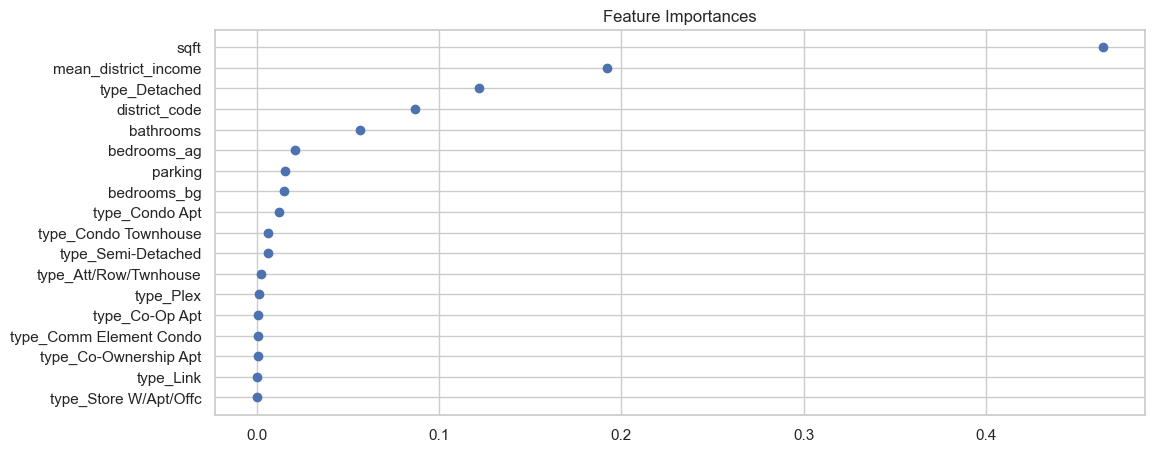

In [132]:
from sklearn.ensemble import ExtraTreesRegressor

sns.set_style("whitegrid")
plt.figure(figsize=[12,5])
df = houses_dummies.dropna(subset=['sqft'])
model = ExtraTreesRegressor(n_estimators=10)
model.fit(df[predictors], df.final_price)

sorted_feature_importance = sorted(zip(model.feature_importances_, df[predictors].columns))

x = [a[0] for a in sorted_feature_importance]
y = [a[1] for a in sorted_feature_importance]

plt.scatter(x,y)
plt.title('Feature Importances')
plt.show()

#### Extract the top-features from our training dataset that have the highest correlation with the Price

<Axes: >

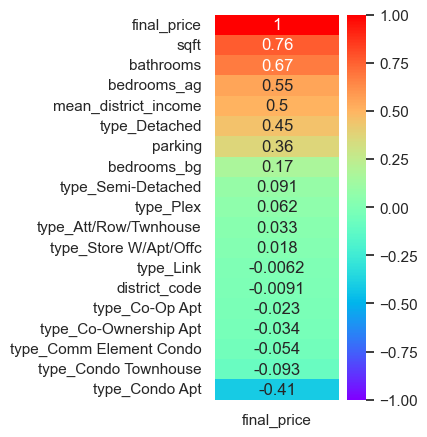

In [133]:
top_features = houses_dummies.corr()[['final_price']].sort_values(by=['final_price'],ascending=False).head(30)
plt.figure(figsize=(2,5))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 12},vmin=-1)

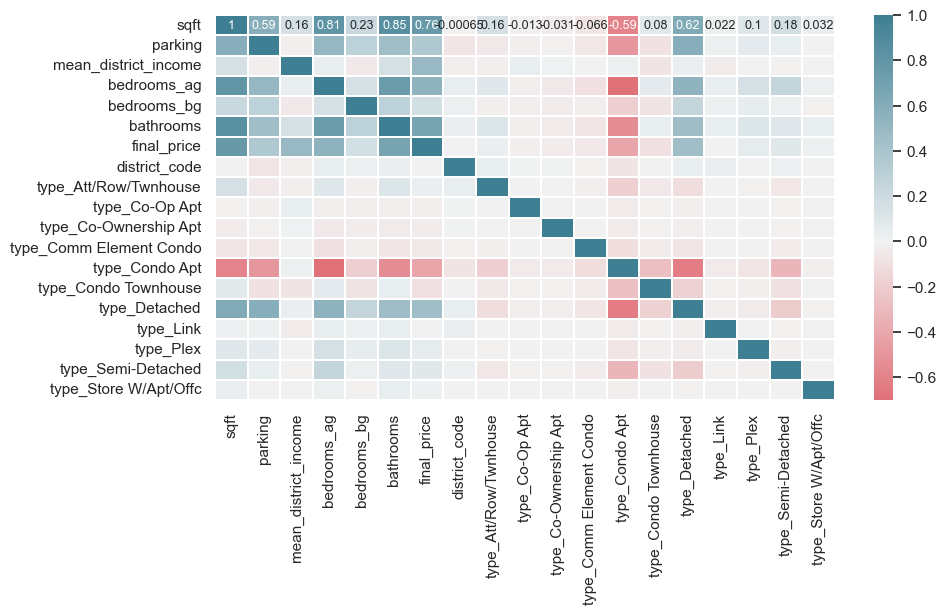

In [134]:
# Create features Heatmap to see how feature are correlated

def correlantion_heatmap(df, center = None):
    fig, ax = plt.subplots(figsize = [10,5])
    colormap = sns.diverging_palette(10, 220, as_cmap=True)
    fig = sns.heatmap(df.corr(),
                cmap = colormap,
               center = center,
                annot = True,
                linewidths = 0.1,
                annot_kws={'fontsize':9})
    
    
correlantion_heatmap(houses_dummies, center=0)

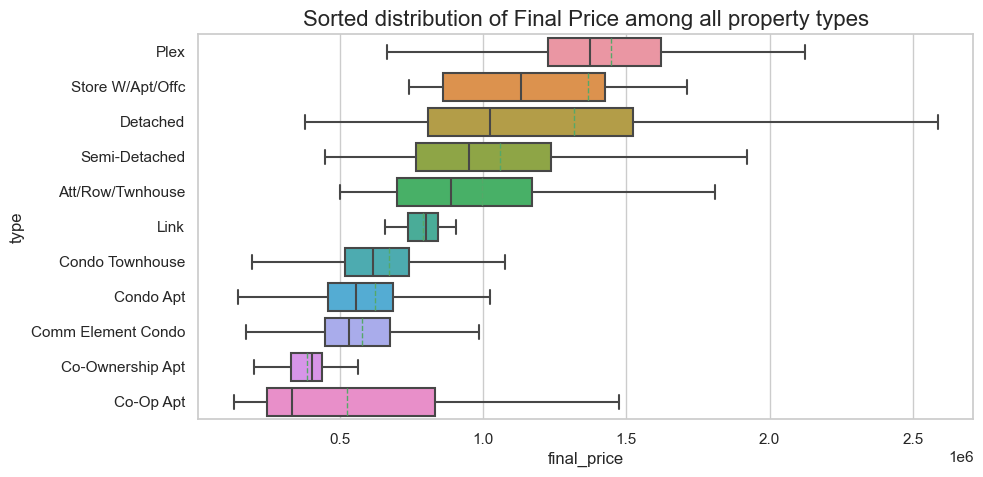

In [135]:
houses_types = pd.unique(data.type)
sns.set_style("whitegrid")
plt.subplots(figsize=[10,5])
sorted_medians = sorted([(data[data.type==st].final_price.median(), st) for st in houses_types], reverse=True)
sns.boxplot(y = 'type', x = 'final_price', data = data, orient='h', showfliers=False, meanline =True, showmeans=True, 
            order=[b for a,b in sorted_medians])
plt.title('Sorted distribution of Final Price among all property types', fontsize=16)
plt.show()

### Scatterplot these important features

/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

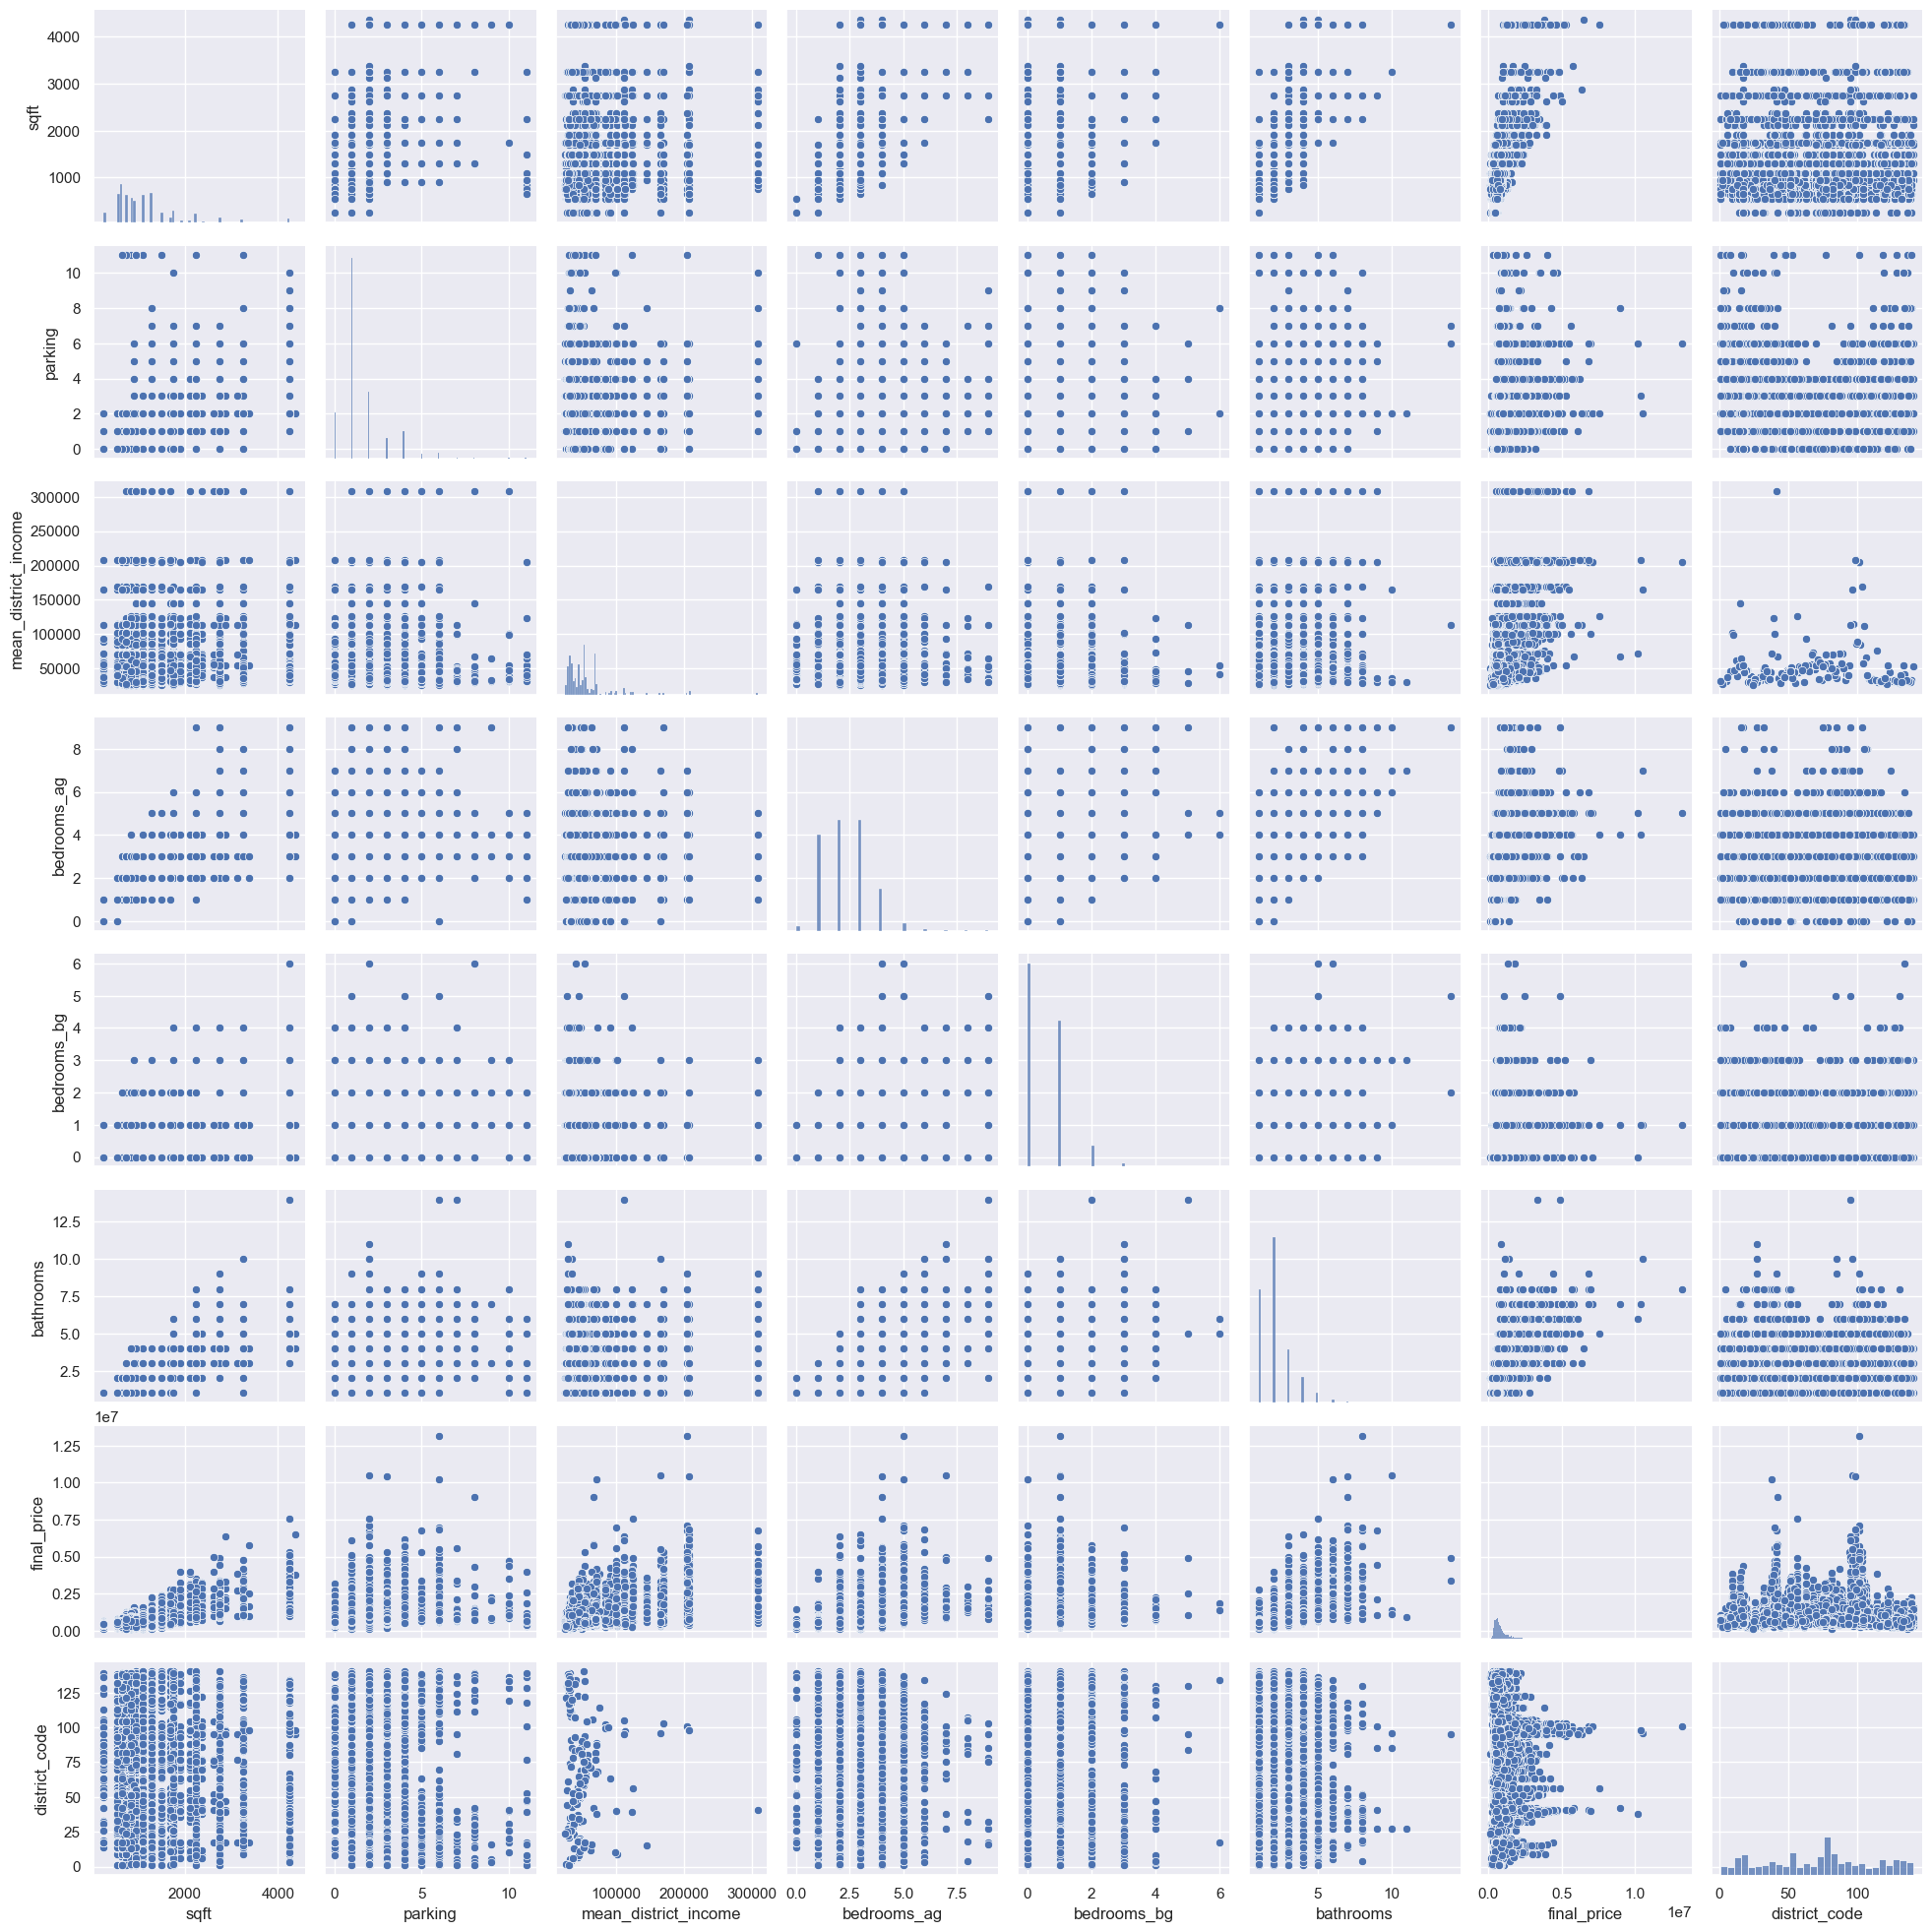

In [136]:
#scatterplot
sns.set()
sns.pairplot(data[needed_columns], height = 2.5)
plt.show();

<Axes: xlabel='final_price', ylabel='sqft'>

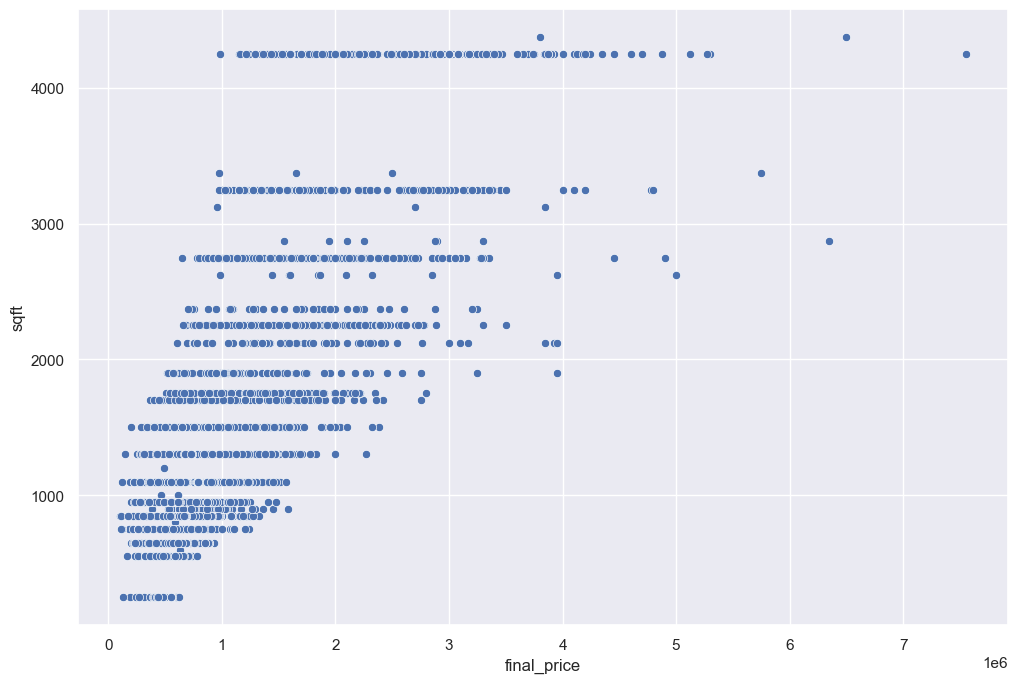

In [137]:
# feature with higher correlation
plt.figure(figsize=(12,8))
sns.scatterplot(x='final_price',y='sqft',data=data)

<Axes: xlabel='bathrooms', ylabel='final_price'>

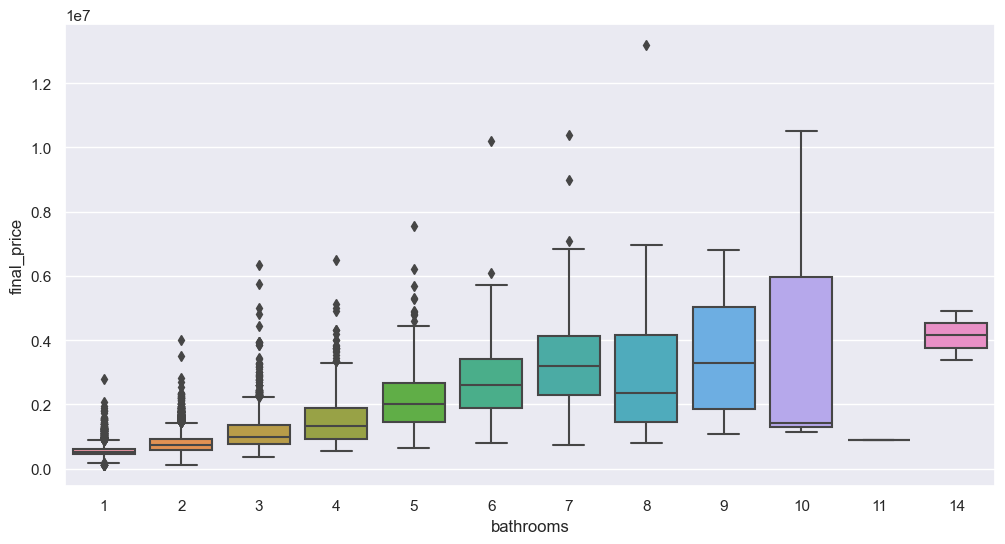

In [138]:
# feature like number or bathroom
plt.figure(figsize = (12,6))
sns.boxplot(x = 'bathrooms',y = 'final_price', data = data)

/var/folders/bm/mbwgf9yx4x18r_3xghcr94d80000gn/T/ipykernel_11683/3588640599.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['final_price'])
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


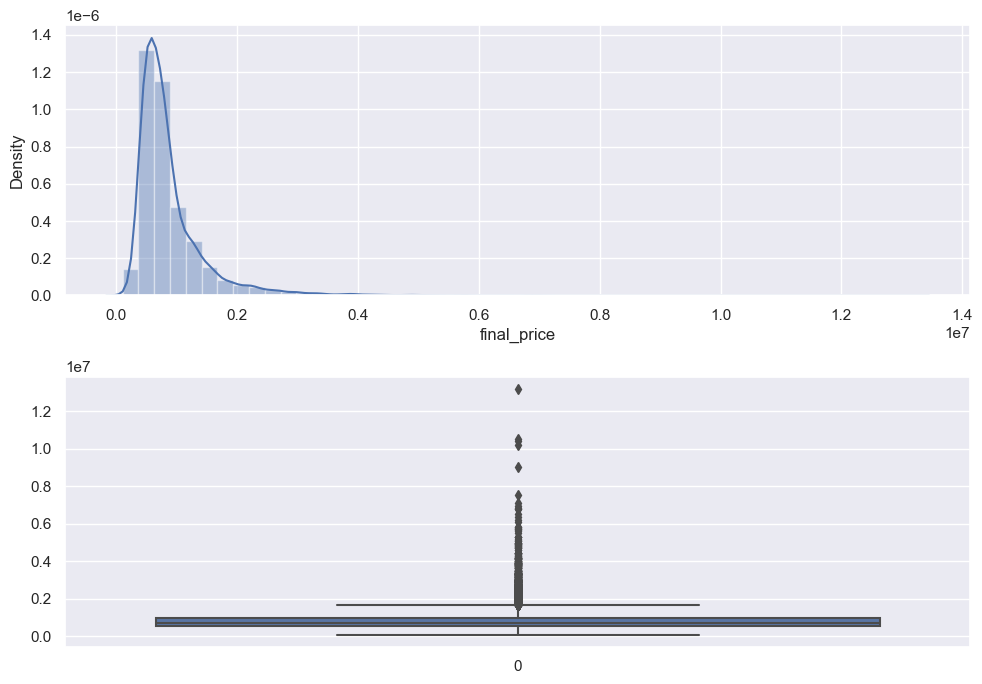

In [139]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(data['final_price'])
fig.add_subplot(2,1,2)
sns.boxplot(data['final_price'])
plt.tight_layout()

In [140]:
# Converting 'True' to 1 and 'False' to 0 in all columns
data = houses_dummies.map(lambda x: 1 if x == 'True' else (0 if x == 'False' else x))

In [141]:
# Removing lines that contain at least one NaN value
data = houses_dummies.dropna()

#### Verify if dataset is balanced

In [142]:
# Replace 'target_column' with the actual name of your target variable column
class_counts = houses_dummies['final_price'].value_counts()

# Display the counts for each class
print(class_counts)

# Check if the dataset is balanced
is_balanced = class_counts.min() == class_counts.max()
if is_balanced:
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")


final_price
650000     102
700000      91
750000      84
525000      83
590000      81
          ... 
924200       1
527670       1
331500       1
1070018      1
543800       1
Name: count, Length: 2961, dtype: int64
The dataset is not balanced.


# 2. Scaling and Train Test Split

In [143]:
from sklearn.model_selection import train_test_split

X = data.drop('final_price',axis =1).values
y = data['final_price'].values

# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# 3. Feature Scalling

In [144]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

# 4. Explore models and short-list the best ones

In [145]:
from sklearn.utils import all_estimators

# Get all scikit-learn estimators
estimators = all_estimators(type_filter='regressor')  # Use 'classifier' for classifiers

for name, RegressorClass in estimators:
    print(name)

ARDRegression
AdaBoostRegressor
BaggingRegressor
BayesianRidge
CCA
DecisionTreeRegressor
DummyRegressor
ElasticNet
ElasticNetCV
ExtraTreeRegressor
ExtraTreesRegressor
GammaRegressor
GaussianProcessRegressor
GradientBoostingRegressor
HistGradientBoostingRegressor
HuberRegressor
IsotonicRegression
KNeighborsRegressor
KernelRidge
Lars
LarsCV
Lasso
LassoCV
LassoLars
LassoLarsCV
LassoLarsIC
LinearRegression
LinearSVR
MLPRegressor
MultiOutputRegressor
MultiTaskElasticNet
MultiTaskElasticNetCV
MultiTaskLasso
MultiTaskLassoCV
NuSVR
OrthogonalMatchingPursuit
OrthogonalMatchingPursuitCV
PLSCanonical
PLSRegression
PassiveAggressiveRegressor
PoissonRegressor
QuantileRegressor
RANSACRegressor
RadiusNeighborsRegressor
RandomForestRegressor
RegressorChain
Ridge
RidgeCV
SGDRegressor
SVR
StackingRegressor
TheilSenRegressor
TransformedTargetRegressor
TweedieRegressor
VotingRegressor


Now we can create estimator space and preselect 20 models that might contribute to our solution. Then we’ll run every algorithm through our train set, cross validate the results and save everything to one dataframe.

# 5. Methods

## Method 1: Multiple Linear Regression

In [146]:
#Liner Regression
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([ 3.13537463e+05, -3.07315318e+04,  1.76558986e+05, -8.25679024e+04,
       -5.54366984e+03,  9.56055103e+04,  7.10854249e+02,  1.15083073e+17,
        3.48637964e+16,  4.38478803e+16,  1.14657751e+17,  3.87631201e+17,
        2.53169815e+17,  2.70594597e+17,  3.01992536e+16,  4.49838334e+16,
        1.56163513e+17,  1.00720337e+16])

In [147]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
0,510000,6.765499e+05
1,642000,4.817979e+05
2,895000,1.194806e+06
3,832000,8.105819e+05
4,518000,8.686939e+05
5,515000,7.022459e+05
6,568000,5.649339e+05
7,713000,6.005339e+05
8,472000,5.594619e+05
9,396591,3.224699e+05


/var/folders/bm/mbwgf9yx4x18r_3xghcr94d80000gn/T/ipykernel_11683/3327774683.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

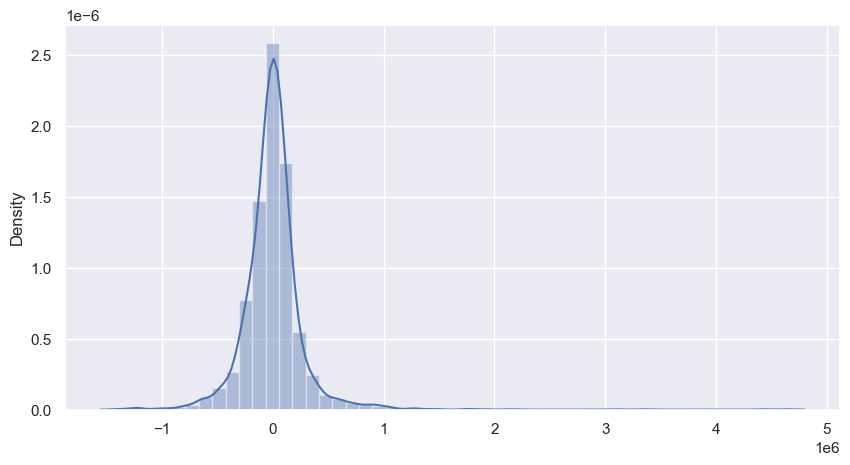

In [148]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_predd)
sns.distplot(residuals)

In [149]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

Mean Absolute Error: 168114.37
Mean Squared Error:81778649279.44
Root Mean Squared Error:285969.66
Variance score is: 0.70


In [150]:
# we are off about 20% (comparing mean absolut error and mean of price)
import locale
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print(locale.currency(data["final_price"].mean(), grouping=True))

$761,788.10


In [151]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.75
Test Score 0.70


## Method 2: Keras Regression

In [152]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [153]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1))
    return model

In [199]:
model = create_model()

# Compile model
#model.compile(optimizer ='adam', loss = 'mse')
model.compile(optimizer ='adam', loss = 'mae')
#model.compile(optimizer ='adam', loss = 'mape')

# Summary Model
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               2432      
                                                                 
 dense_51 (Dense)            (None, 64)                8256      
                                                                 
 dense_52 (Dense)            (None, 32)                2080      
                                                                 
 dense_53 (Dense)            (None, 20)                660       
                                                                 
 dense_54 (Dense)            (None, 10)                210       
                                                                 
 dense_55 (Dense)            (None, 4)                 44        
                                                                 
 dense_56 (Dense)            (None, 1)                

In [200]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=600, batch_size=128)

Epoch 1/600
57/57 [==============================] - 0s 2ms/step - loss: 759684.9375 - val_loss: 765978.6250
Epoch 2/600
57/57 [==============================] - 0s 1ms/step - loss: 758954.5625 - val_loss: 763139.6875
Epoch 3/600
57/57 [==============================] - 0s 1ms/step - loss: 743143.2500 - val_loss: 716871.8750
Epoch 4/600
57/57 [==============================] - 0s 987us/step - loss: 584938.4375 - val_loss: 367686.8438
Epoch 5/600
57/57 [==============================] - 0s 1ms/step - loss: 284960.3438 - val_loss: 257574.6562
Epoch 6/600
57/57 [==============================] - 0s 987us/step - loss: 239291.7969 - val_loss: 227908.3281
Epoch 7/600
57/57 [==============================] - 0s 970us/step - loss: 213434.2344 - val_loss: 207659.2031
Epoch 8/600
57/57 [==============================] - 0s 968us/step - loss: 195847.2344 - val_loss: 193266.8125
Epoch 9/600
57/57 [==============================] - 0s 973us/step - loss: 182631.4062 - val_loss: 182521.7188
Epoch 10/

<Axes: >

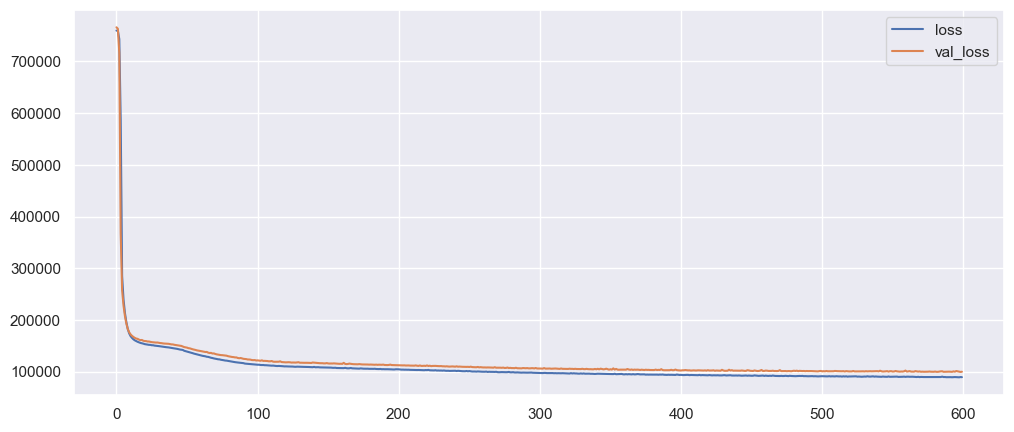

In [201]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,5))

## Evaluation on Test Data

In [202]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
y_pred = model.predict(X_test)

[INFO] predicting house prices...
111/111 [==============================] - 0s 324us/step


In [203]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 99841.05
Mean Squared Error: 37862529120.37
Root Mean Squared Error: 194582.96
Variance score is: 0.86


In [204]:
# we are off about 20% (comparing mean absolut error and mean of price)
import locale
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print(locale.currency(data["final_price"].mean(), grouping=True))

$761,788.10


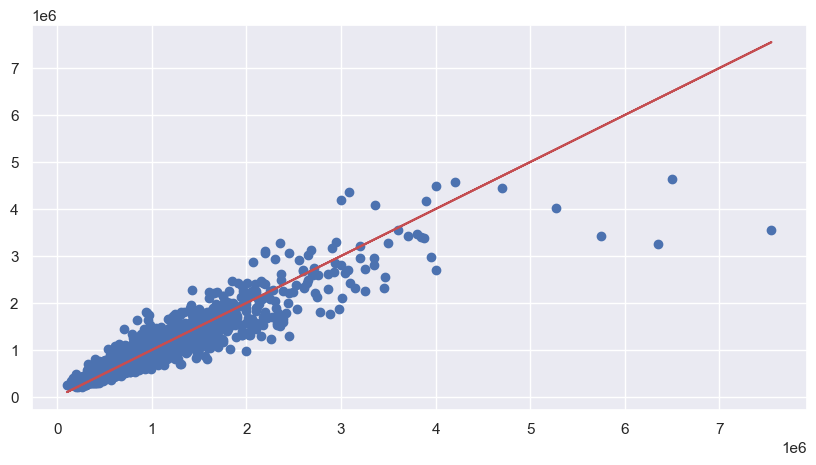

In [205]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

## How we can use the model?

In [206]:
# let's drop price and keep first line featurs, then put those featur inside the model and estimae the price!
single_house = data.drop('final_price',axis = 1).iloc[0]

In [207]:
# need to apply featur scalling on those featurs
single_house = s_scaler.transform(single_house.values.reshape(-1,18))

In [208]:
# apply model on those featurs
model.predict(single_house)

1/1 [==============================] - 0s 14ms/step


array([[814156.]], dtype=float32)

In [209]:
# compare the prediction with real price for the first column
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print(locale.currency(data["final_price"][0], grouping=True))

$855,000.00


## Multiple Linear Regression vs Keras Regression

In [210]:
print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

Model: Keras Regression

Mean Absolute Error(MAE): 99841.05
Mean Squared Error(MSE): 37862529120.37
Root Mean Squared Error(RMSE): 194582.96
Variance score: 86.27

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 168114.37
Mean Squared Error(MSE):81778649279.44
Root Mean Squared Error(RMSE):285969.66
Variance score: 70.18
